This notebook will implement GCC-PHAT 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as signal 


In [2]:
%matplotlib notebook

In [3]:
fs = 192000
t = np.linspace(0,0.002, 384)
a = signal.chirp(t,25000,t[-1],85000)
a *= signal.tukey(a.size, 0.1)

ch1 = np.random.normal(0,1e-5,1920)
ch2 = np.random.normal(0,1e-5,1920)

time1 = 595
time2 = time1 - 280
ch1[time1:time1+a.size] += a
ch2[time2:time2+a.size] += a*0.02



<IPython.core.display.Javascript object>


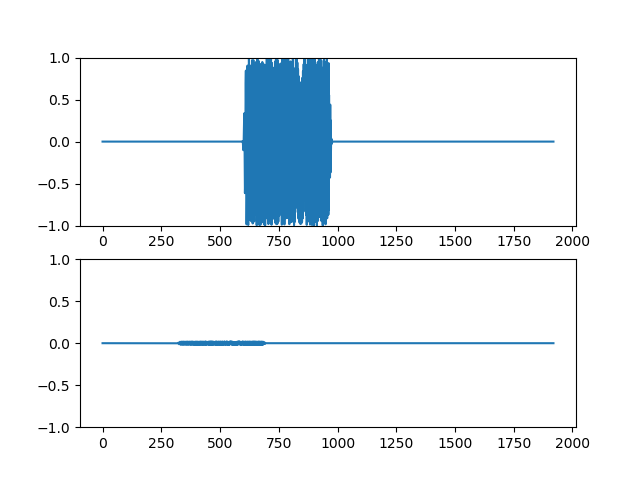

(-1, 1)

In [4]:
plt.figure()
plt.subplot(211)
plt.plot(ch1);plt.ylim(-1,1)
plt.subplot(212)
plt.plot(ch2);plt.ylim(-1,1)

In [5]:
# following http://www.xavieranguera.com/phdthesis/node92.html
g_phat_num = np.fft.rfft(ch1)*np.conjugate(np.fft.rfft(ch2))
g_phat = g_phat_num/(np.abs(g_phat_num))
gphat_ifft = np.fft.irfft(g_phat)

<IPython.core.display.Javascript object>


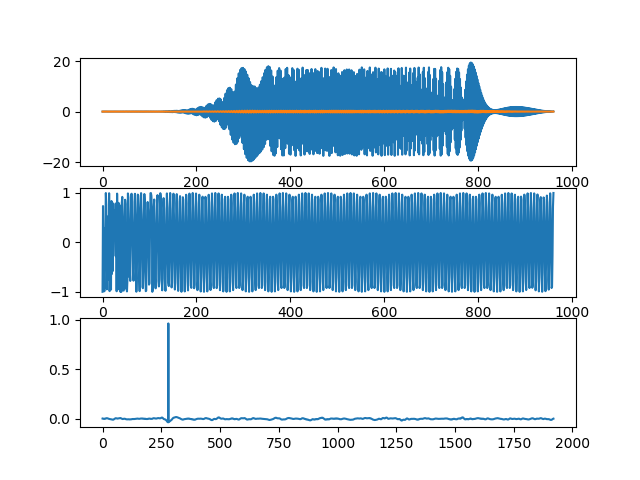

/home/autumn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/autumn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/autumn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [6]:
plt.figure()
plt.subplot(311)
plt.plot(np.fft.rfft(ch1))
plt.plot(np.fft.rfft(ch2))
plt.subplot(312)
plt.plot(g_phat)
plt.subplot(313)
plt.plot(gphat_ifft)

<IPython.core.display.Javascript object>


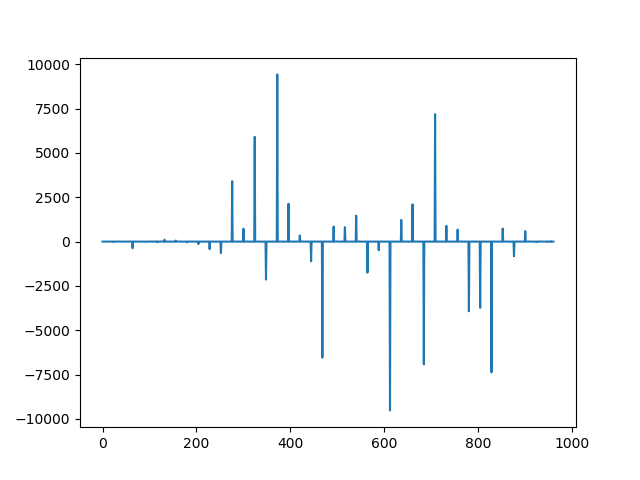

In [7]:
plt.figure()
plt.plot(np.imag(g_phat)/np.real(g_phat))

In [8]:
np.argmax(gphat_ifft)

280

In [9]:
if np.argmax(gphat_ifft) > gphat_ifft.size*0.5:
    print(f'delay = {(gphat_ifft.size-np.argmax(gphat_ifft))/fs}')
elif np.argmax(gphat_ifft) <= gphat_ifft.size*0.5:
    print(f'delay = {-(np.argmax(gphat_ifft))/fs}')


delay = -0.0014583333333333334
